In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#!/usr/bin/env python
import os

topdir = r'E:\Grad\LIS\LIS590 Text mining\Part1\Part1'
matches = []
for root, dirnames, filenames in os.walk(topdir):
    for filename in filenames:
        if filename.endswith(('.txt','.html','.pdf')):
            matches.append(os.path.join(root, filename))
print("\n".join(matches))

In [ ]:
df = pd.read_csv('kyphosis.csv')

# Mục mới

In [ ]:
df.head()


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:
df.describe()


,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


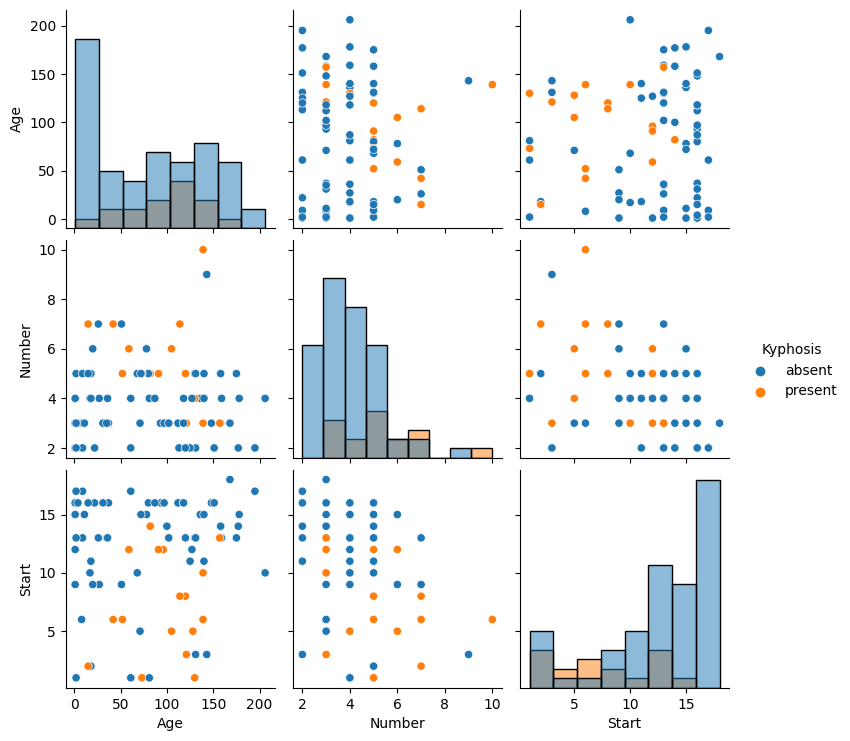

In [ ]:
sns.pairplot(df,hue = 'Kyphosis',diag_kind='hist')


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop('Kyphosis',axis = 1)
y = df['Kyphosis']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dtree = DecisionTreeClassifier()


In [ ]:
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
prediction = dtree.predict(X_test)
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))


[[19  3]
 [ 1  2]]


              precision    recall  f1-score   support

      absent       0.95      0.86      0.90        22
     present       0.40      0.67      0.50         3

    accuracy                           0.84        25
   macro avg       0.68      0.77      0.70        25
weighted avg       0.88      0.84      0.86        25



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

      absent       0.95      0.86      0.90        22
     present       0.40      0.67      0.50         3

    accuracy                           0.84        25
   macro avg       0.68      0.77      0.70        25
weighted avg       0.88      0.84      0.86        25





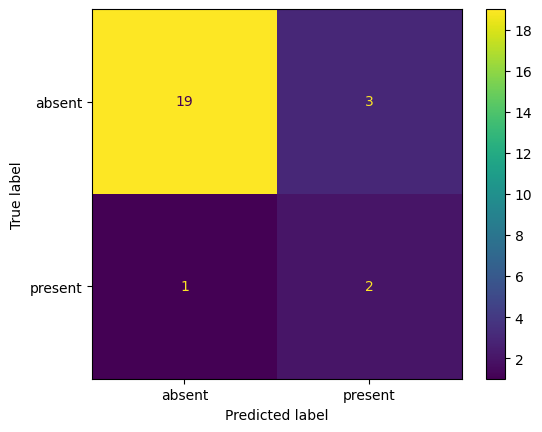

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test,predictions,labels=clf.classes_)

print(classification_report(y_test,predictions))
print('\n')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

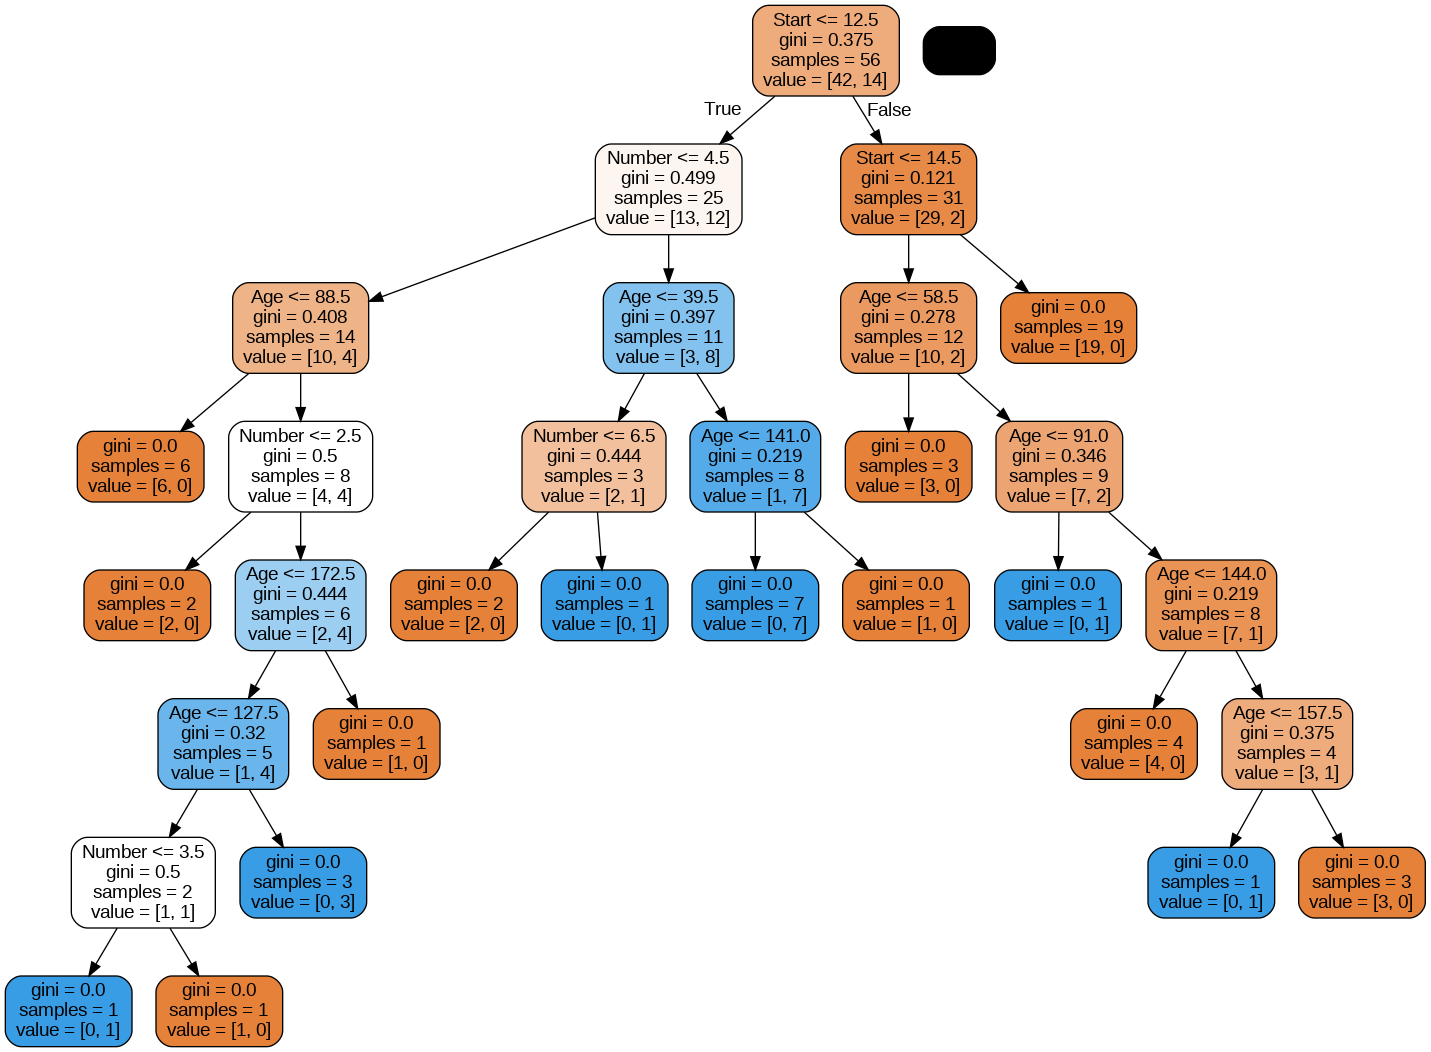

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png())  

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_model = RandomForestClassifier()


In [ ]:
rfc = RandomForestClassifier(n_estimators=200)


In [ ]:
rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=200)

In [ ]:
rfc_pred = rfc.predict(X_test)


In [ ]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[20  2]
 [ 1  2]]


              precision    recall  f1-score   support

      absent       0.95      0.91      0.93        22
     present       0.50      0.67      0.57         3

    accuracy                           0.88        25
   macro avg       0.73      0.79      0.75        25
weighted avg       0.90      0.88      0.89        25



In [ ]:
#  acc for decision Tree
dtree = round(dtree.score(X,y)*100,2)
print(dtree)

95.06


In [ ]:
rfc = round(rfc.score(X,y)*100,2)
print(rfc)

96.3


In [ ]:
output = pd.DataFrame({'Kyphosis':rfc_pred})
output.to_csv('my_submission.csv',index=False)
print("your submission was sucessfully saved!!")

your submission was sucessfully saved!!


In [ ]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X,y)
RandomForestClassifier(n_estimators=200)

RandomForestClassifier(n_estimators=200)

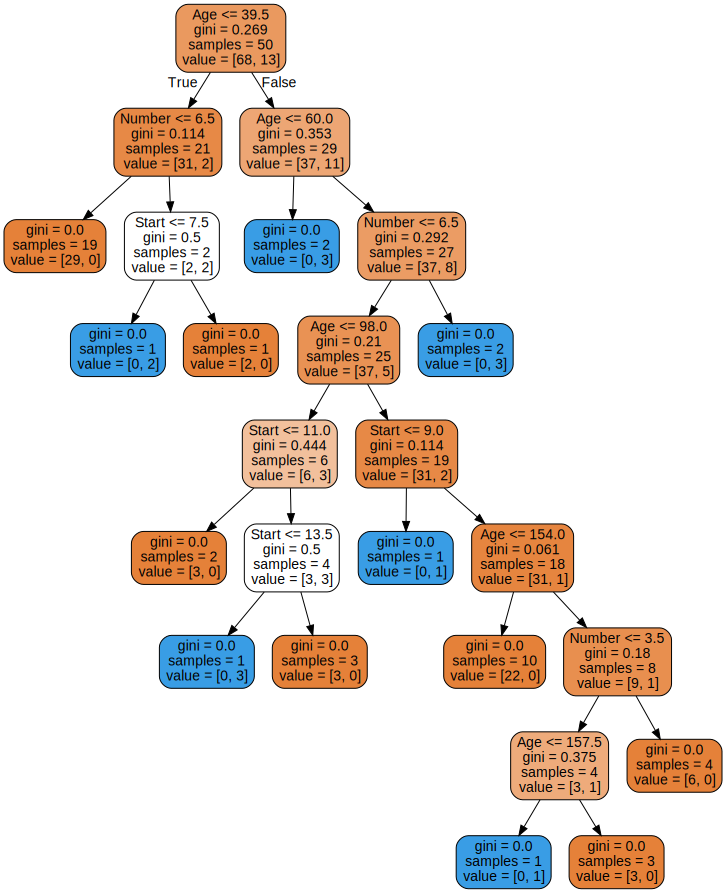

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(rf.estimators_[0], 
                           feature_names=features,
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

[[20  1]
 [ 2  2]]
/n
              precision    recall  f1-score   support

      absent       0.91      0.95      0.93        21
     present       0.67      0.50      0.57         4

    accuracy                           0.88        25
   macro avg       0.79      0.73      0.75        25
weighted avg       0.87      0.88      0.87        25



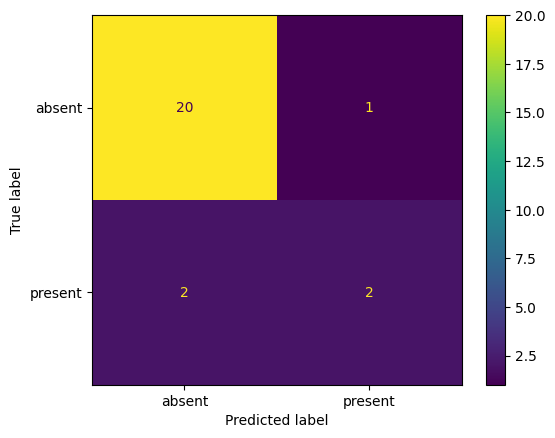

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(rfc_pred,y_test,labels=clf.classes_)

print(confusion_matrix(rfc_pred,y_test))
print('/n')
print(classification_report(rfc_pred,y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()